Simple Analyis:
1. Want to isolate a few columns from the massive data set.
2. Simple descriptive statistics and some graphical representation.
    a. The age distribution by gender was examined. 
    b. There are more woman than men respondents at every age level.
    c. The average age of women are slightly higher.

3. A merge of additional data limited to a few columns of data.
    a. Age distribtuion of Macro Analysis [age distribution of male vs femaleSimple descriptive statistics plus some correlation estimates.
4. 

In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
all_summary = pd.read_csv('data/atussum_2014.dat')
gender_sum = all_summary[['tucaseid','TEAGE', 'TESEX']]
gender_sum = gender_sum.rename(columns={'tucaseid':'CASE_ID',
                              'TEAGE': 'AGE',       # age in years
                              'TESEX': 'GENDER'     # gender; Male = 1, Female = 2
                                     }
                            )

m_age = gender_sum[gender_sum.GENDER == 1]          # Male = 1; list of ages
f_age = gender_sum[gender_sum.GENDER == 2]          # Female = 2; distribtuion of ages 

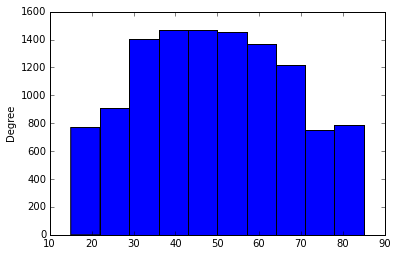

In [67]:
gender_sum['AGE'].plot(kind='hist')

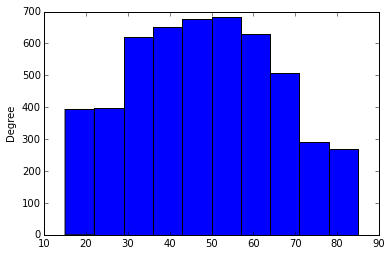

In [73]:
m_age['AGE'].plot(kind='hist')

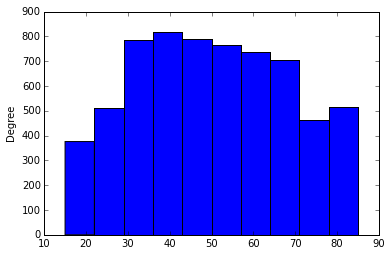

In [75]:
f_age['AGE'].plot(kind='hist')

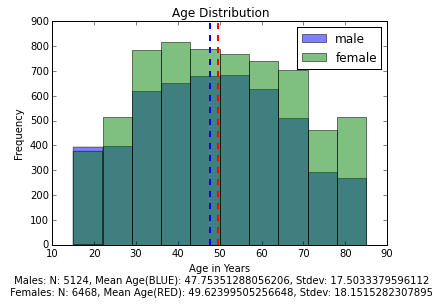

In [121]:
x = list(m_age['AGE'])      # true list of male ages
y = list(f_age['AGE'])      # true list of female ages
xm = m_age['AGE'].mean()    # mean of male ages
yf = f_age['AGE'].mean()    # mean of female ages

plt.hist(x, bins=10, alpha=0.5, label='male')
plt.axvline(xm, color='b', linestyle='dashed', linewidth=2)
plt.hist(y, bins=10, alpha=0.5, label='female')
plt.axvline(yf, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.title("Age Distribution")
plt.xlabel('Age in Years\n Males: N: {}, Mean Age(BLUE): {}, Stdev: {}\n Females: N: {}, Mean Age(RED): {}, Stdev: {}'.format(
        np.count_nonzero(x),np.mean(x),np.std(x),np.count_nonzero(y),np.mean(y),np.std(y)))
plt.ylabel('Frequency')
plt.show()


In [98]:
m_age['AGE'].mean()

47.753512880562063

In [35]:
pd.pivot_table(gender_sum, index=['GENDER'], values=['AGE'], aggfunc=[np.amin, np.amax, np.count_nonzero, np.average])

,amin,amax,count_nonzero,average
,AGE,AGE,AGE,AGE
GENDER,,,,
1,15,85,5124,47.753513
2,15,85,6468,49.623995


In [41]:
pd.pivot_table(gender_sum, index=['GENDER'], values=['AGE'], aggfunc=[np.count_nonzero, np.average])

,count_nonzero,average
,AGE,AGE
GENDER,,
1,5124,47.753513
2,6468,49.623995


In [62]:
gender_sum.loc[1][['AGE','GENDER']]

AGE       16
GENDER     2
Name: 1, dtype: int64